In [1]:
import numpy as np
import pyemma
from scipy import constants

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


In [2]:
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=200)
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


## Ligand binding vs Trp

In [5]:
metad_fe_trp_chi1 = np.loadtxt("./Reweighting/fes_trpnewdist.dat")[:, 0]
metad_fe_newdist = np.loadtxt("./Reweighting/fes_trpnewdist.dat")[:, 1]
metad_fe = np.loadtxt("./Reweighting/fes_trpnewdist.dat")[:, 2]

In [6]:
# FE is written out in kJ/mol --> kT
# first convert to J/mol
conversion_factor = 1000
# then convert to J by dividing by Avogadro constant (units of mol^-1)
conversion_factor = conversion_factor / constants.N_A
# now convert from J to kT
conversion_factor = conversion_factor / (constants.k * 300)

In [7]:
metad_pi = np.exp(-metad_fe * conversion_factor)
metad_pi = metad_pi / np.sum(metad_pi)

In [8]:
np.sum(metad_pi)

1.0

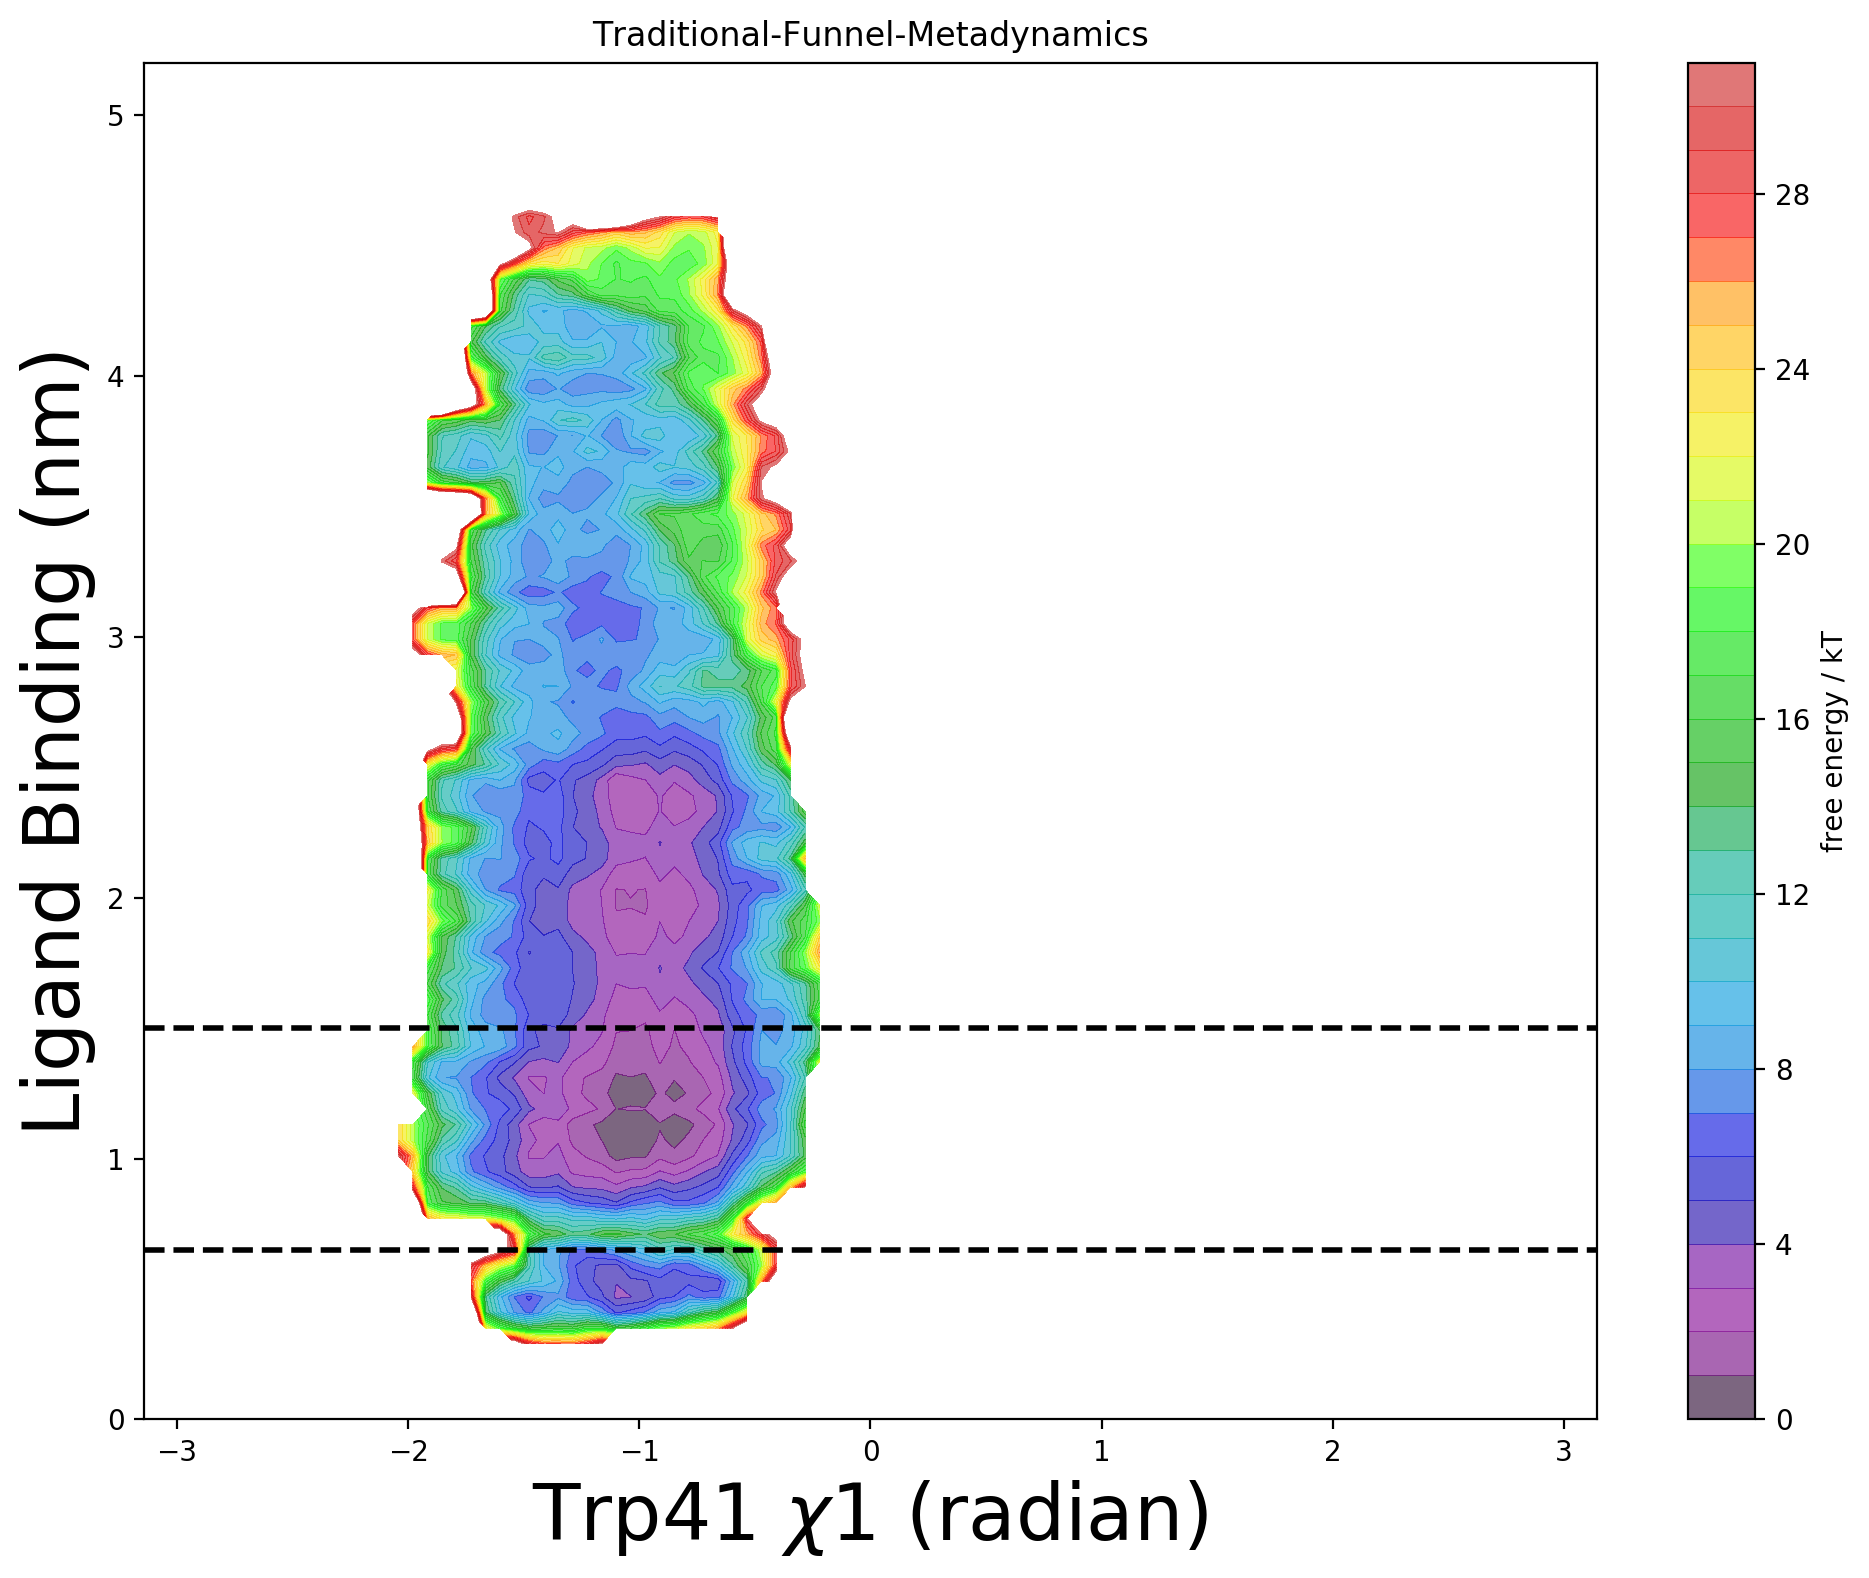

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_fe_trp_chi1, metad_fe_newdist, weights=metad_pi, ax=ax, nbins=100, levels=np.arange(0, 32, 1), vmin=0, vmax=32, alpha=0.6)
ax.set_xlabel('Trp41 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Ligand Binding (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.0, 5.2)
ax.set_title('Traditional-Funnel-Metadynamics')
ax.axhline(y=0.65, color='black', linestyle='--', linewidth=2)
ax.axhline(y=1.5, color='black', linestyle='--', linewidth=2)
#ax.scatter(chi1, chi2, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

## Trp Dihedral Angles

In [10]:
metad_trp_chi1 = np.loadtxt("./Reweighting/fes_trpchi1chi2.dat")[:, 0]
metad_trp_chi2 = np.loadtxt("./Reweighting/fes_trpchi1chi2.dat")[:, 1]
metad_fe_trp = np.loadtxt("./Reweighting/fes_trpchi1chi2.dat")[:, 2]

In [11]:
metad_trppi = np.exp(-metad_fe_trp * conversion_factor)
metad_trppi = metad_trppi / np.sum(metad_trppi)

In [12]:
np.sum(metad_trppi)

1.0000000000000002

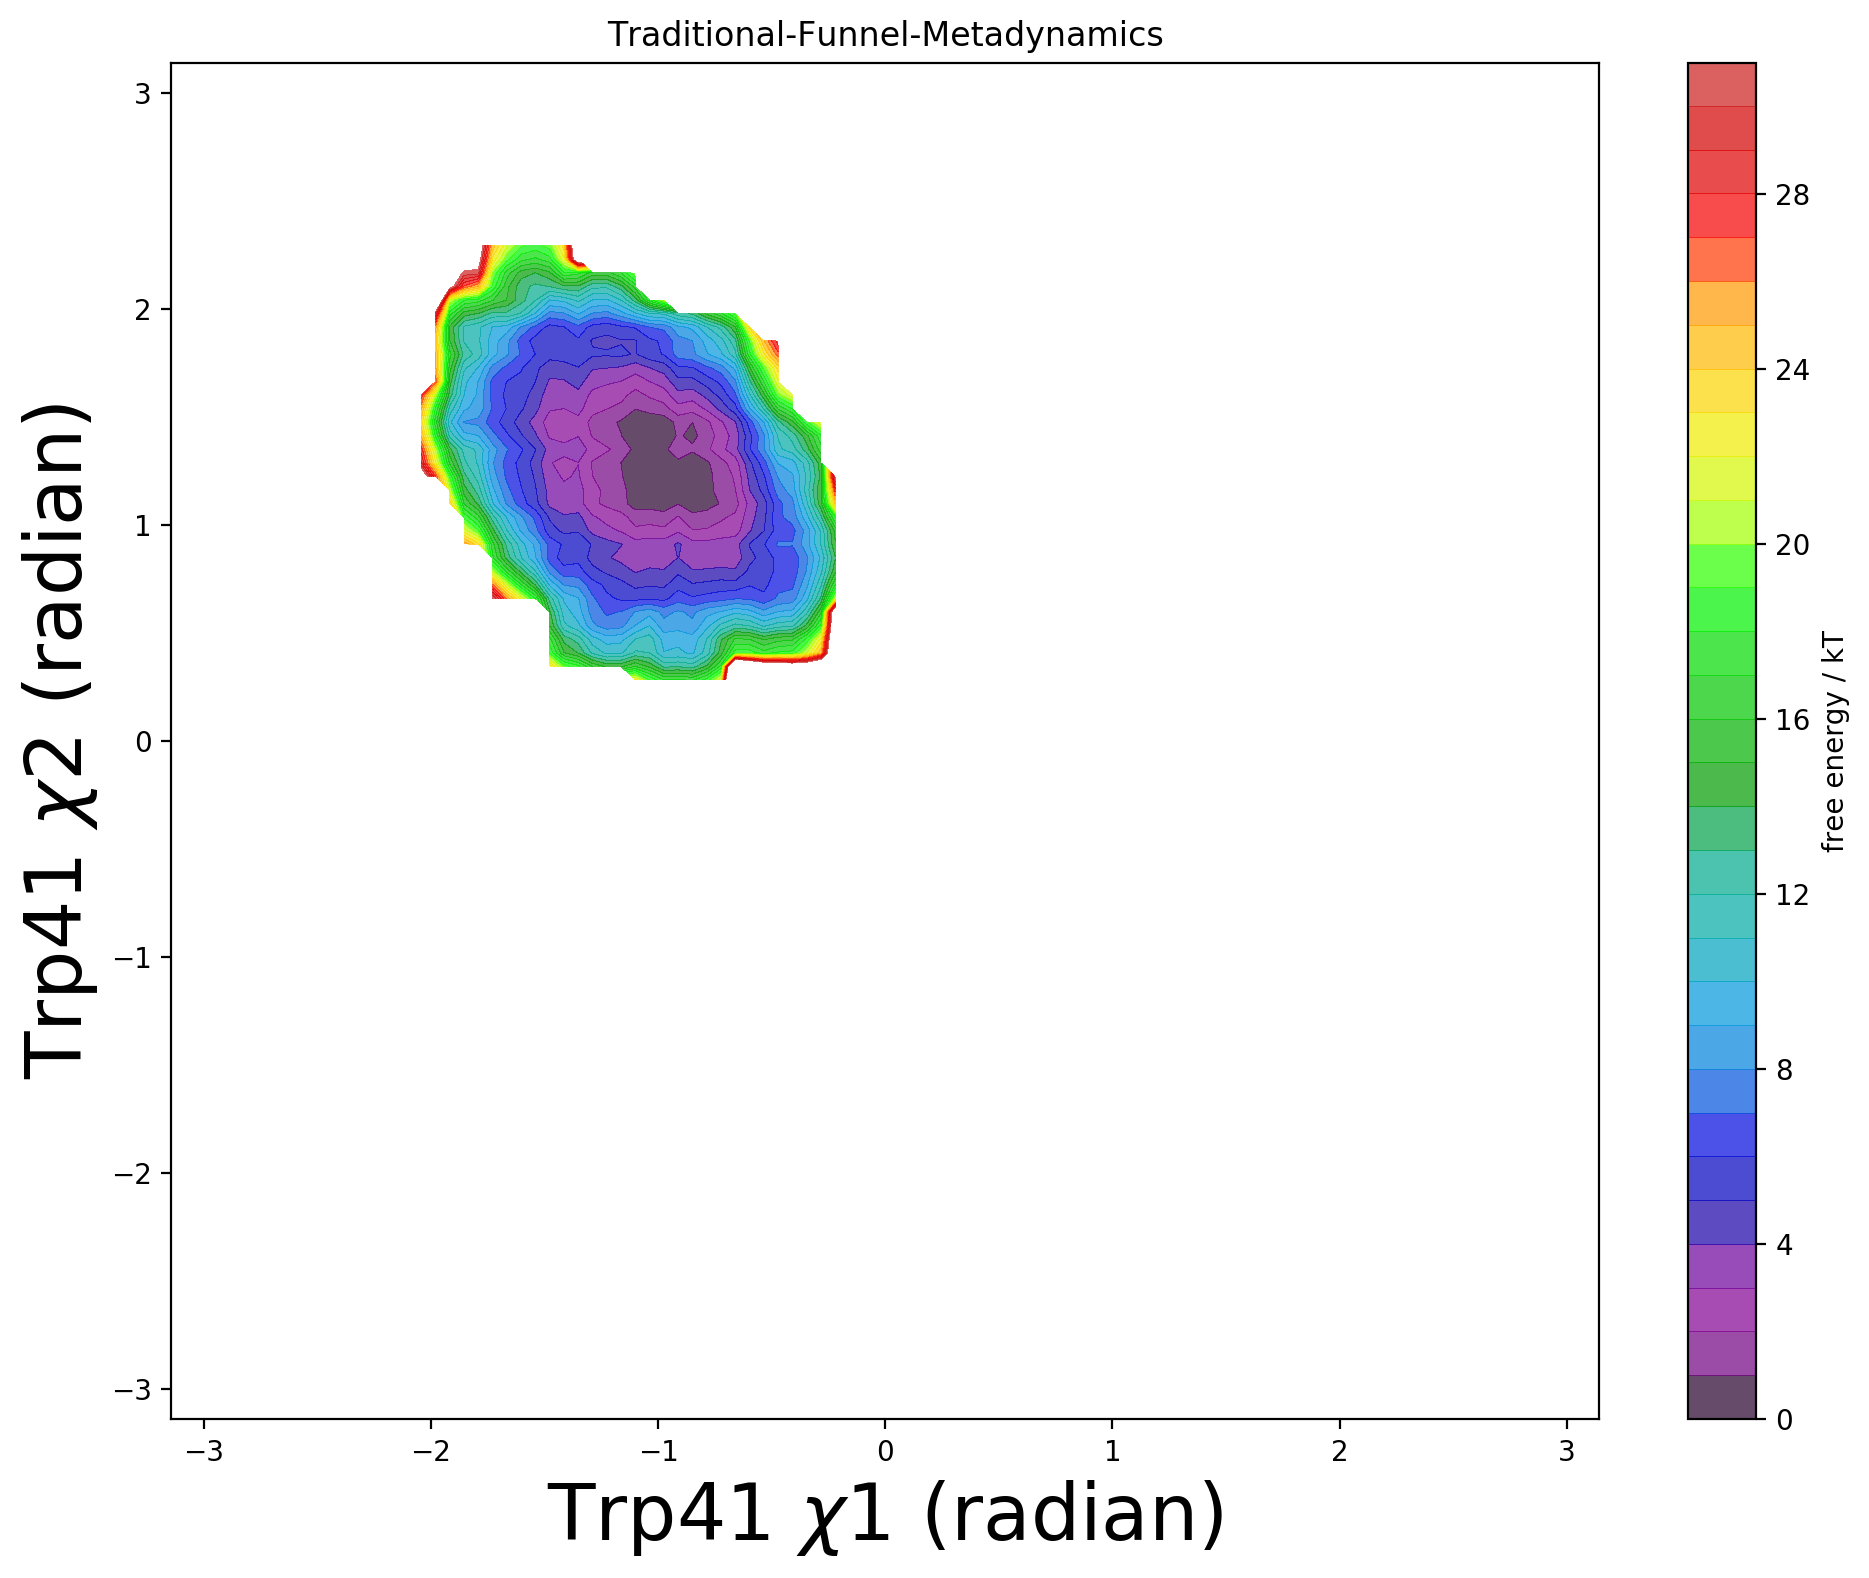

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_trp_chi1, metad_trp_chi2, weights=metad_trppi, ax=ax, nbins=100, levels=np.arange(0, 32, 1), vmin=0, vmax=32, alpha=0.7)
ax.set_xlabel('Trp41 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Trp41 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_title('Traditional-Funnel-Metadynamics')
#ax.scatter(chi1, chi2, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

In [16]:
from tqdm import tqdm

## Typical distance

In [4]:
colvar_org = np.loadtxt('./Reweighting/COLVAR-stride')

In [5]:
dist=colvar_org[:, 1]

In [6]:
dist.shape

(100001,)

In [7]:
time= np.arange(0, 100001, 1)

In [8]:
time.shape

(100001,)

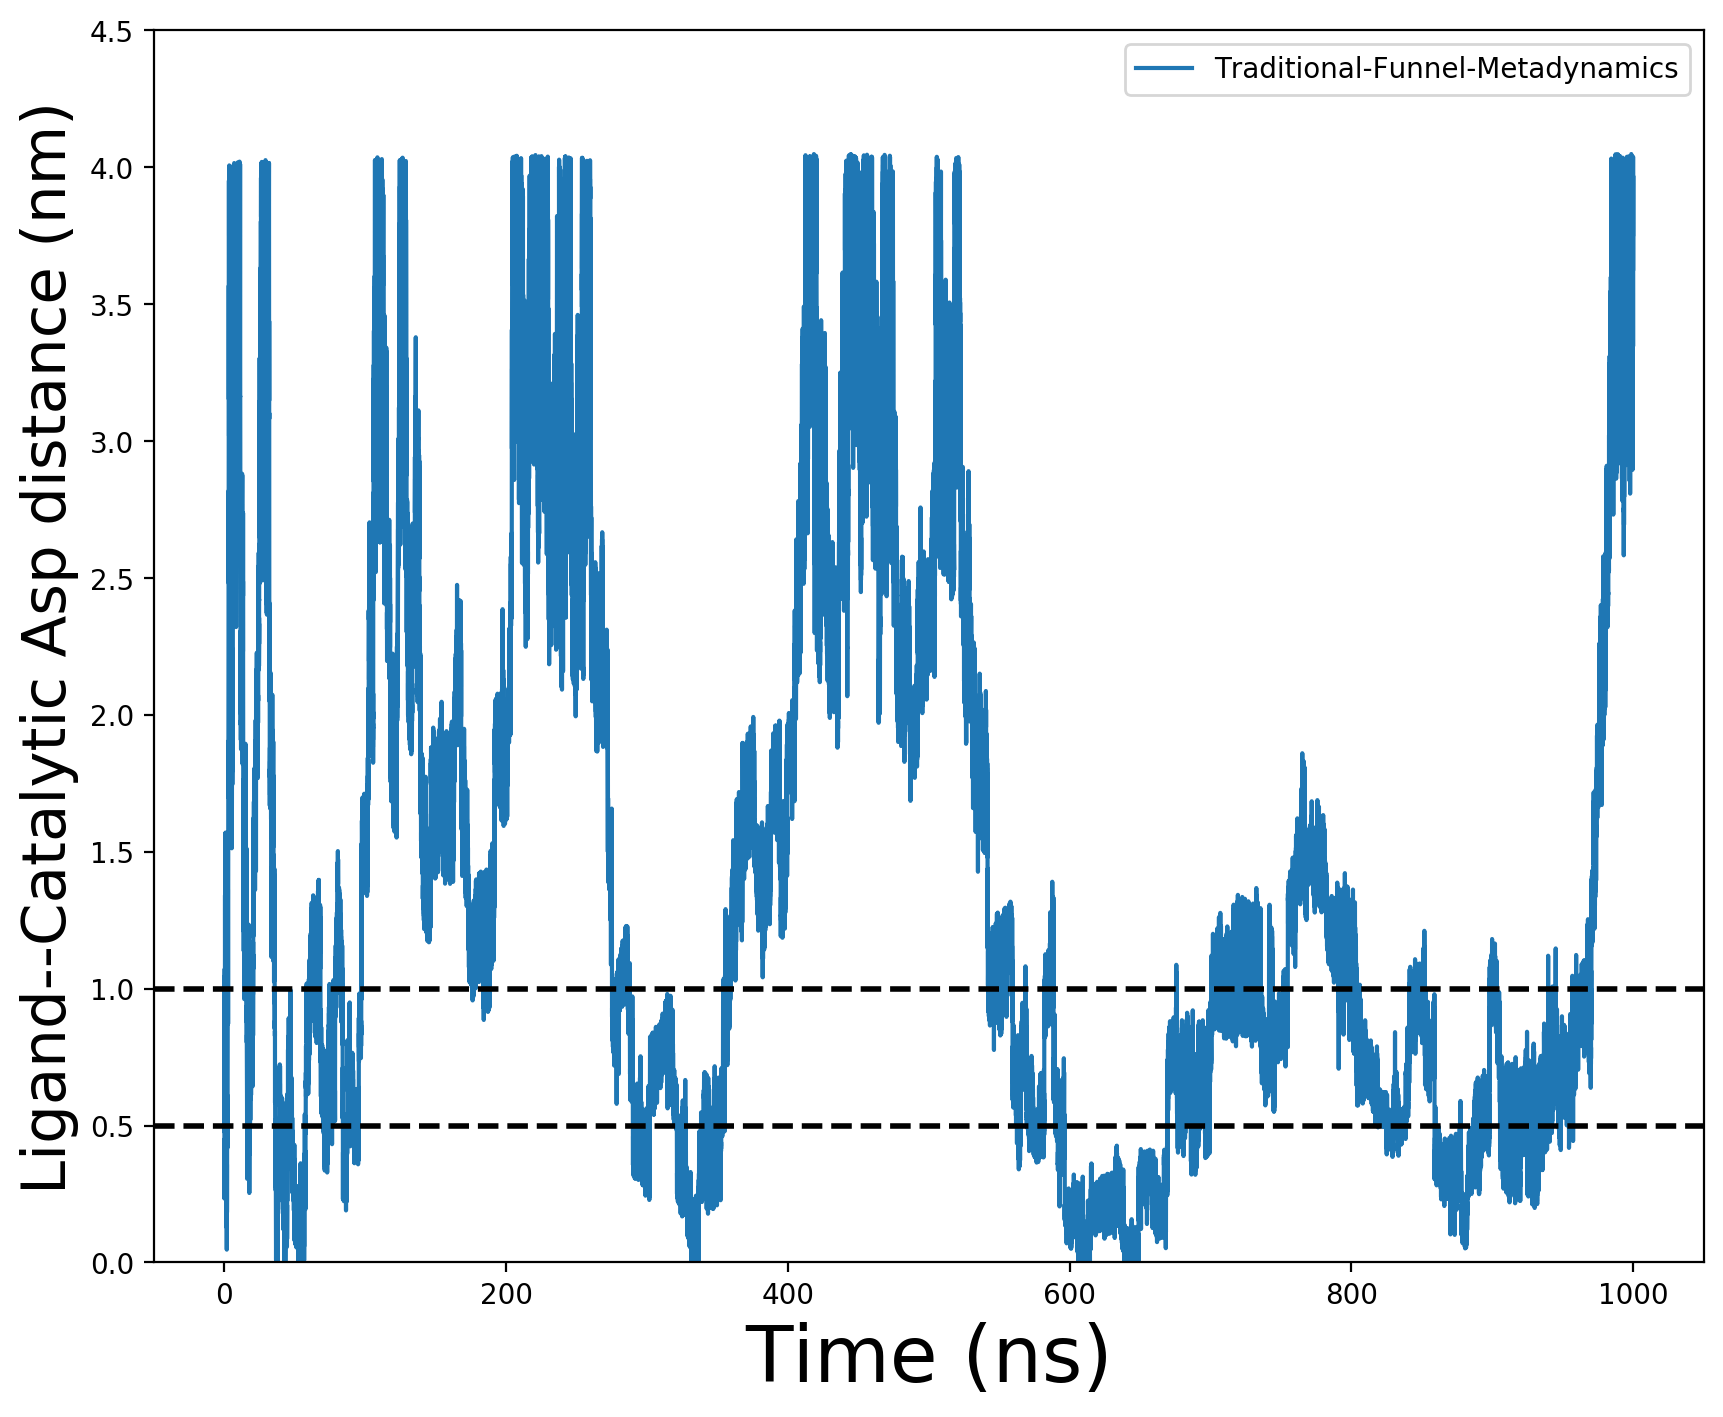

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time/100, dist, '', label='Traditional-Funnel-Metadynamics')
plt.xlabel('Time (ns)', fontsize=28)
plt.ylabel('Ligand--Catalytic Asp distance (nm)', fontsize=22)
ax.set_ylim(0, 4.5)
ax.axhline(y=1.0, color='black', linestyle='--', linewidth=2)
ax.axhline(y=0.50, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

## Flap Open

In [4]:
metad_trp_flap = np.loadtxt("./Reweighting/fes_trpflapopen.dat")[:, 0]
metad_trp_flapdist = np.loadtxt("./Reweighting/fes_trpflapopen.dat")[:, 1]
metad_fe_flap = np.loadtxt("./Reweighting/fes_trpflapopen.dat")[:, 2]

In [7]:
metad_trpflappi = np.exp(-metad_fe_flap * conversion_factor)
metad_trpflappi = metad_trpflappi / np.sum(metad_trpflappi)

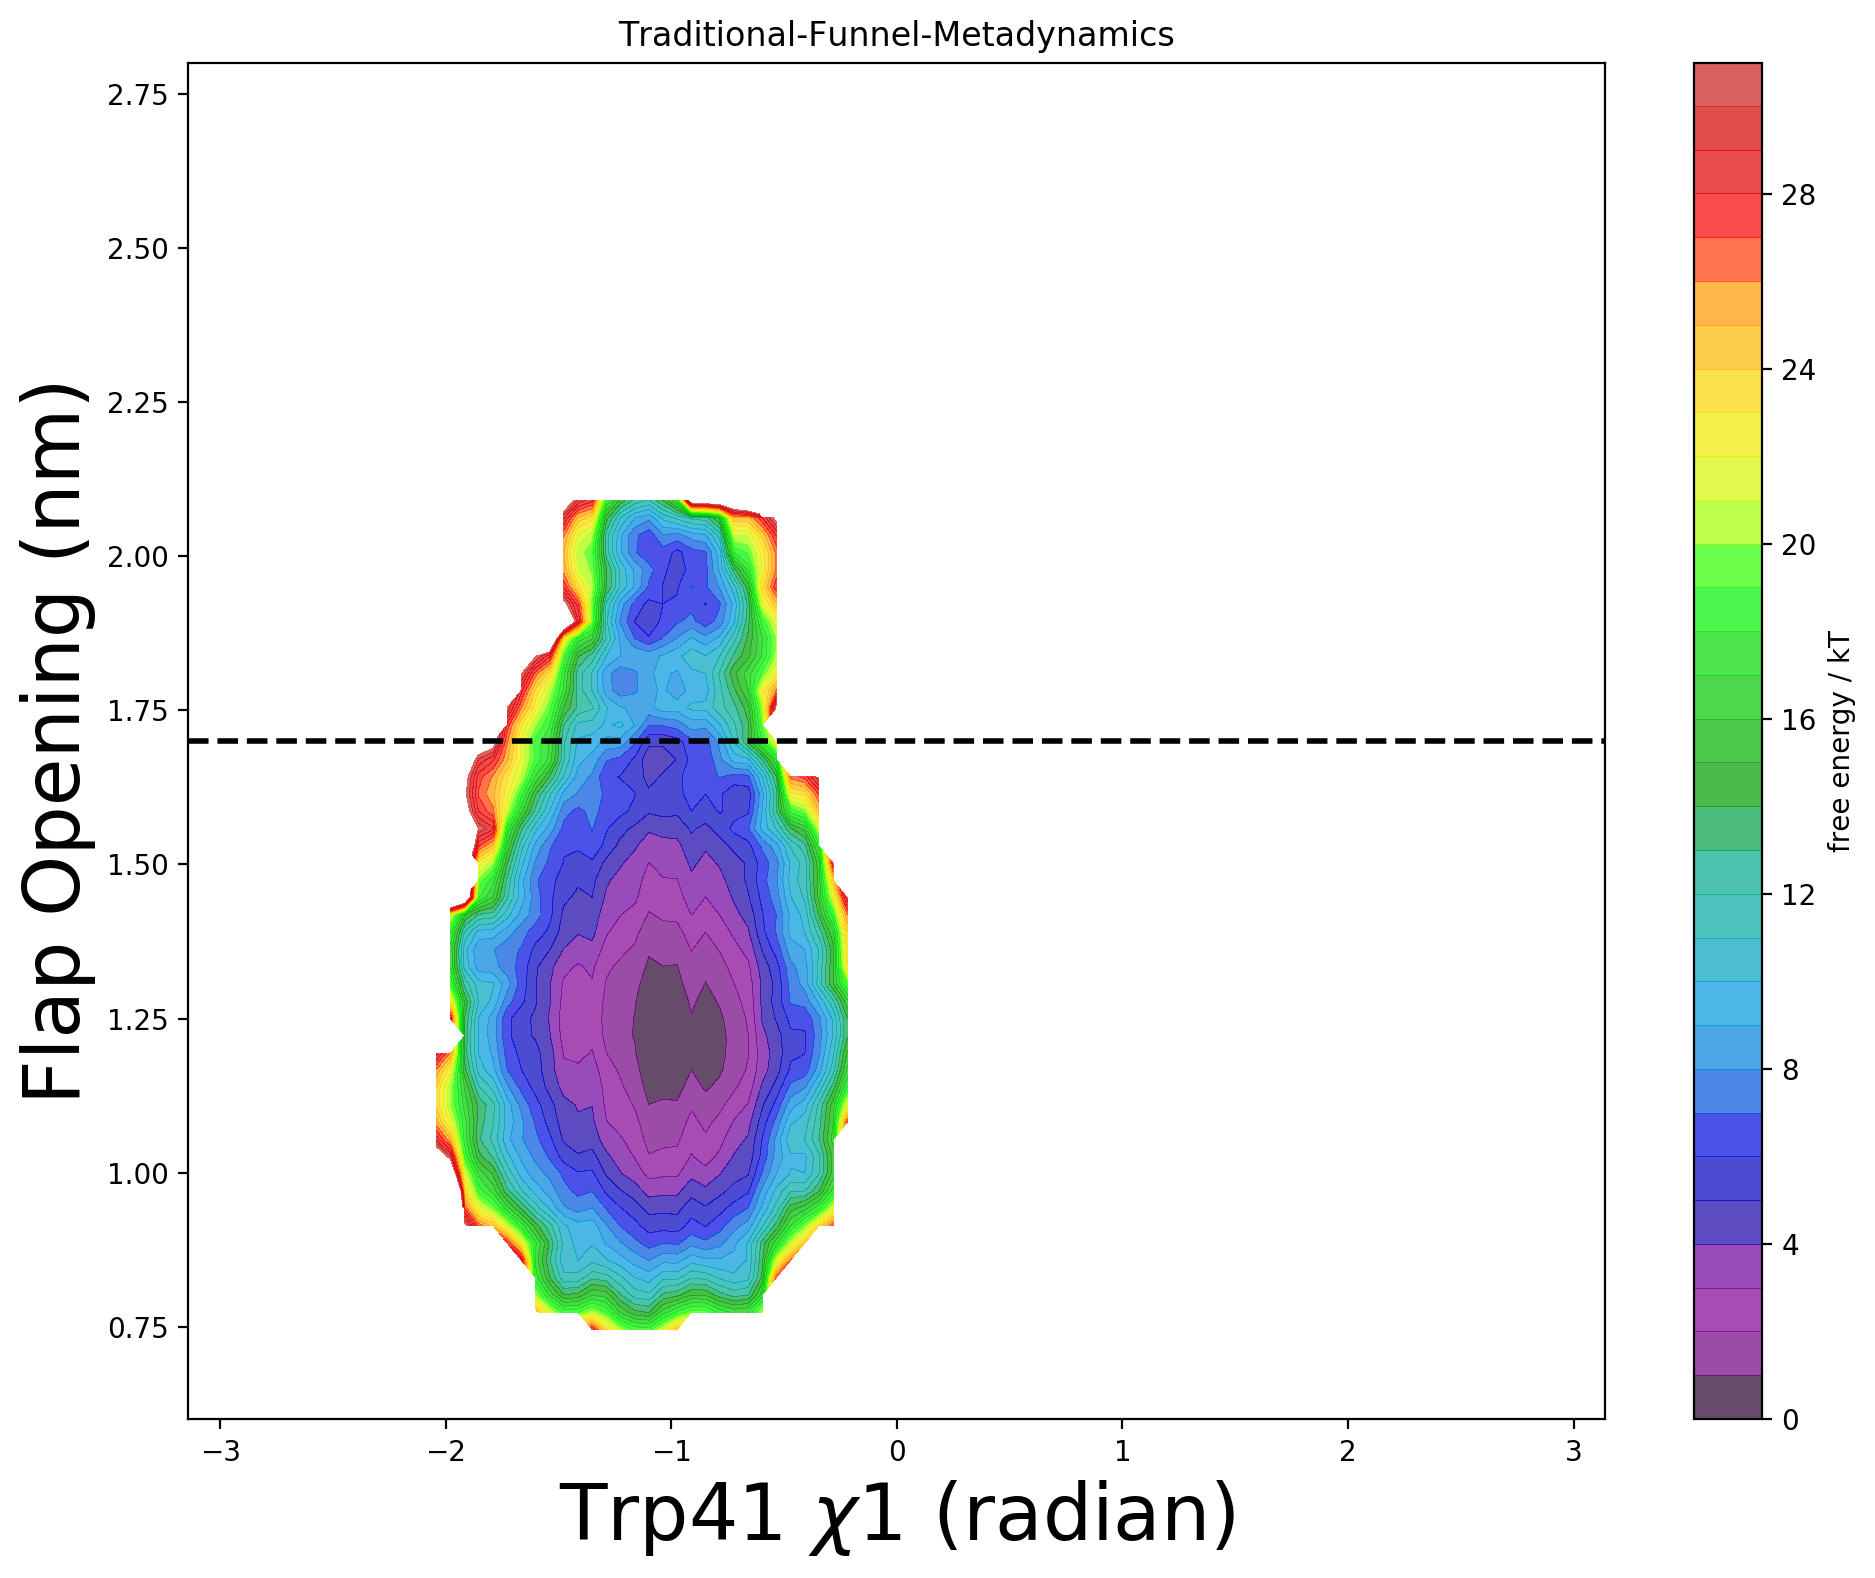

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_trp_flap, metad_trp_flapdist, weights=metad_trpflappi, ax=ax, nbins=100, levels=np.arange(0, 32, 1), vmin=0, vmax=32, alpha=0.7)
ax.set_xlabel('Trp41 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Flap Opening (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.6, 2.8)
ax.set_title('Traditional-Funnel-Metadynamics')
ax.axhline(y=1.7, color='black', linestyle='--', linewidth=2)
fig.tight_layout()
plt.show()

In [18]:
d4=colvar_files[:, 3]

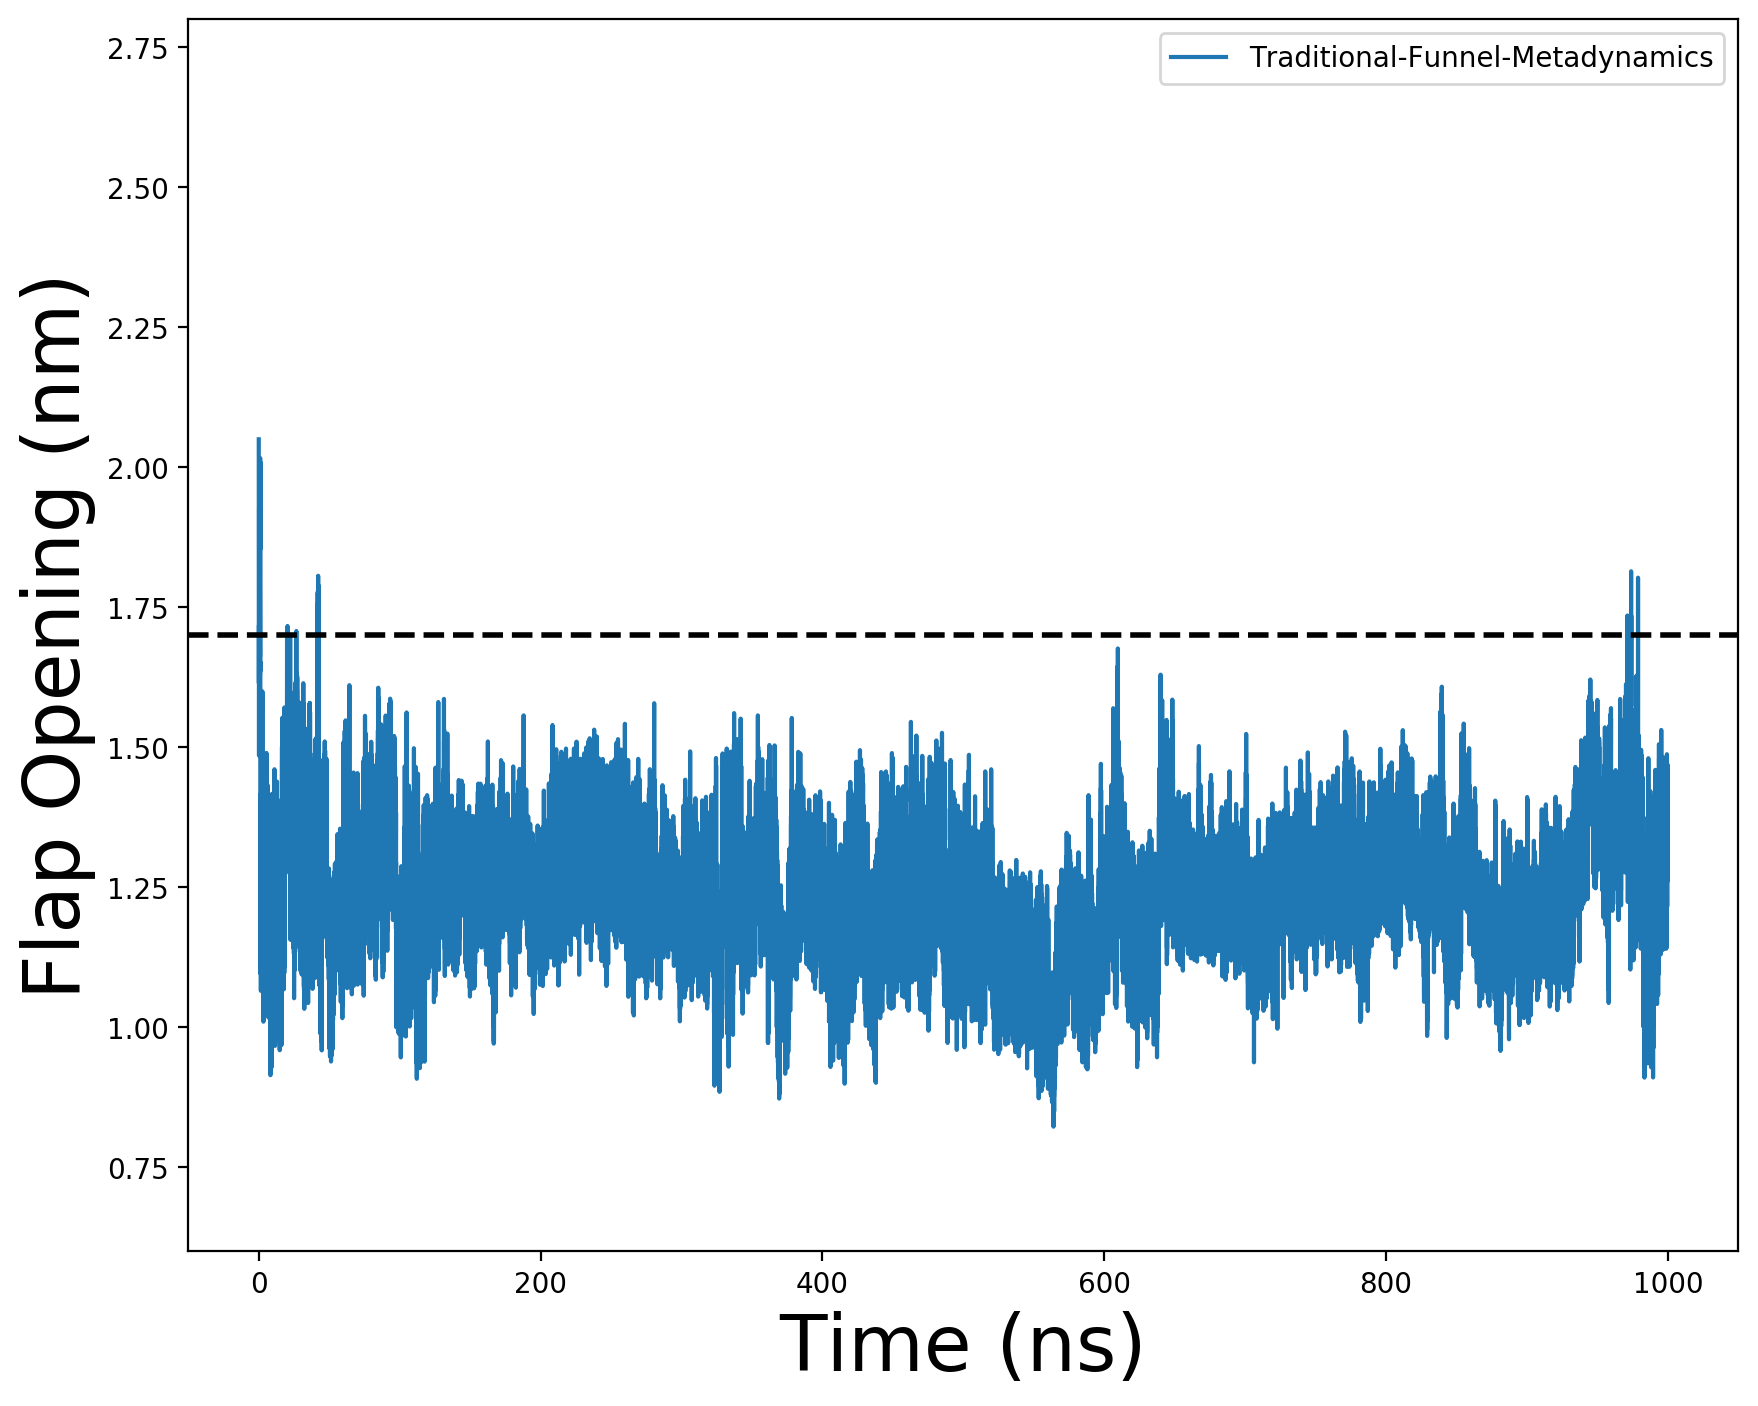

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time/100, d4, '', label='Traditional-Funnel-Metadynamics')
plt.xlabel('Time (ns)', fontsize=28)
plt.ylabel('Flap Opening (nm)', fontsize=28)
ax.set_ylim(0.6, 2.8)
#ax.axhline(y=0.65, color='black', linestyle='--', linewidth=2)
ax.axhline(y=1.7, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()